# Import & clean

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
survey_data= pd.read_excel("survey data airline.xlsx")
survey_data.head(1)

,Company Name,Age,City,Destination,Take off time?,The period of delay? If found,Was it checked due to the delay?,Reasons for flight delay?,Access time?,How satisfied are you?
0,Fly Nas,18-30,القصيم,مكة,11:00:00,لايوجد,لا,لم يتم ذكر الأسباب,01:30:00,رائع


In [3]:
survey= survey_data.copy()

In [4]:
survey.isnull().sum()
survey=survey.dropna()

In [5]:
survey['Take off time?'] = pd.to_datetime(survey['Take off time?'], format='%H:%M:%S')
survey['Access time?'] = pd.to_datetime(survey['Access time?'], format='%H:%M:%S')
survey["Was it checked due to the delay?"]=survey["Was it checked due to the delay?"].replace({"لا":0, "نعم":1})
survey["The period of delay? If found"]=survey["The period of delay? If found"].replace({"لايوجد":1,
                                   "نصف ساعة إلى ساعة":2,
                                   "ساعتان إلى أربع ساعات":3, 
                                   "أكثر من أربع ساعات":4, 
                                   "تأجيل الرحلة إلى يوم اخر":5})

survey['Take off Hour'] = pd.to_datetime(survey['Take off time?']).dt.hour
survey['Access Minute'] = pd.to_datetime(survey['Access time?']).dt.minute
survey['Access Hour'] = pd.to_datetime(survey['Access time?']).dt.hour
survey['Take off Minute'] = pd.to_datetime(survey['Take off time?']).dt.minute
survey['Company Name']=survey['Company Name'].replace({"Fly Nas":1,
                                   "Saudi Airline":2,
                                   "Fly Adeal":3, 
                                   "SaudiGulf Airline":4})
survey['How satisfied are you?']=survey['How satisfied are you?'].replace({"رائع":1,
                                   "جيد جدًا":2,
                                   "جيد":3, 
                                   "سيئ":4})


C:\Users\extra\AppData\Local\Temp\ipykernel_17248\891492788.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  survey["Was it checked due to the delay?"]=survey["Was it checked due to the delay?"].replace({"لا":0, "نعم":1})
C:\Users\extra\AppData\Local\Temp\ipykernel_17248\891492788.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  survey["The period of delay? If found"]=survey["The period of delay? If found"].replace({"لايوجد":1,
C:\Users\extra\AppData\Local\Temp\ipykernel_17248\891492788.py:14: FutureWarning: Downcasting beha

In [6]:
scrap_data=pd.read_excel("scrap data airline.xlsx")
scrap_data.head(2)

,Unnamed: 0,Company Name,published_at,published_at_datetime,Place Average Rating,Rating,Review,total_reviews,user_name,year,month,day
0,0,Fly Nas,6 days ago,2024-01-27 00:55:39.339835+00:00,3.0,5,0,308,Mohammed Khasara,2024,1,27
1,1,Fly Nas,a week ago,2024-01-26 09:19:29.749652+00:00,3.0,5,0,308,عبدالله الغامدي,2024,1,26


In [7]:
scrap_data.isnull().sum()
scrap_data.duplicated()
scrap_data['published_at_datetime'] = pd.to_datetime(scrap_data['published_at_datetime'])
scrap_data['published_at'] = pd.to_datetime(scrap_data['published_at'], errors='coerce')

C:\Users\extra\AppData\Local\Temp\ipykernel_17248\2734786116.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  scrap_data['published_at'] = pd.to_datetime(scrap_data['published_at'], errors='coerce')


# EDA

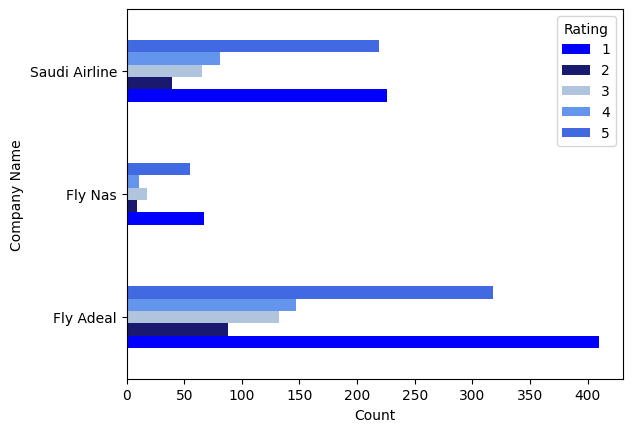

In [8]:
color=['blue','midnightblue','lightsteelblue','cornflowerblue','royalblue']
grouped = scrap_data.groupby('Company Name')['Rating'].value_counts().unstack()
plot = grouped.plot(kind='barh', color=color)

plt.xlabel('Count')
plt.ylabel('Company Name')
plt.legend(title='Rating')
plt.show()

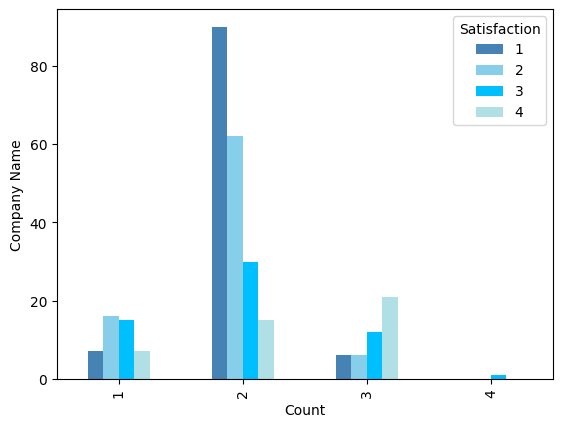

In [9]:
color=['steelblue','skyblue','deepskyblue','powderblue']
grouped = survey.groupby('Company Name')["How satisfied are you?"].value_counts().unstack()
plot = grouped.plot(kind='bar', color=color)

plt.xlabel('Count')
plt.ylabel('Company Name')
plt.legend(title='Satisfaction')
plt.show()

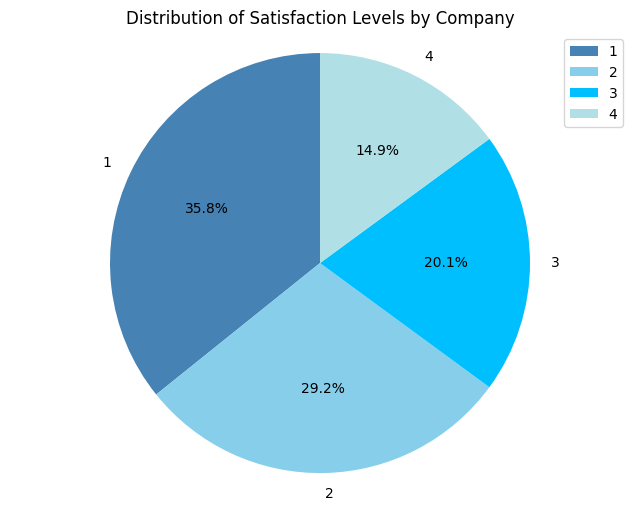

In [10]:
# Assuming you have already grouped the data
color = ['steelblue', 'skyblue', 'deepskyblue', 'powderblue']
grouped = survey.groupby('Company Name')["How satisfied are you?"].value_counts().unstack()



# Now let's create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(grouped.sum(), labels=grouped.columns, colors=color, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Satisfaction Levels by Company')
plt.legend()
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


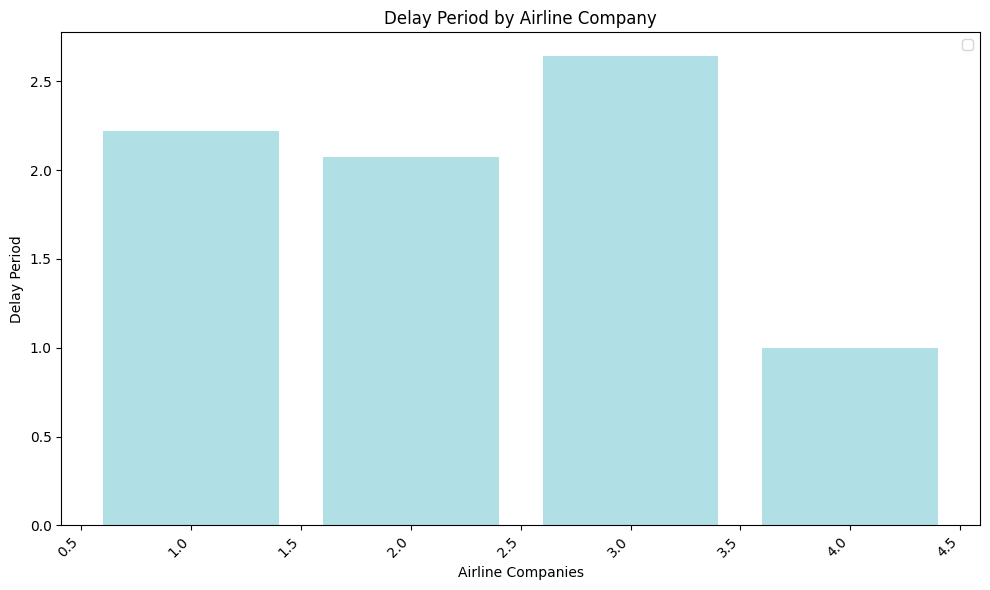

In [11]:
#1 =لايوجد
#نصف ساعة إلى ساعة= 2 
#ساعتان إلى أربع ساعات= 3
#4 =أكثر من أربع ساعات 
#تأجيل الرحلة إلى يوم اخر= 5
# Group by company and calculate the average delay period
grouped = survey.groupby('Company Name')['The period of delay? If found'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped.values, color='powderblue')
plt.xlabel('Airline Companies')
plt.ylabel('Delay Period')
plt.title('Delay Period by Airline Company')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

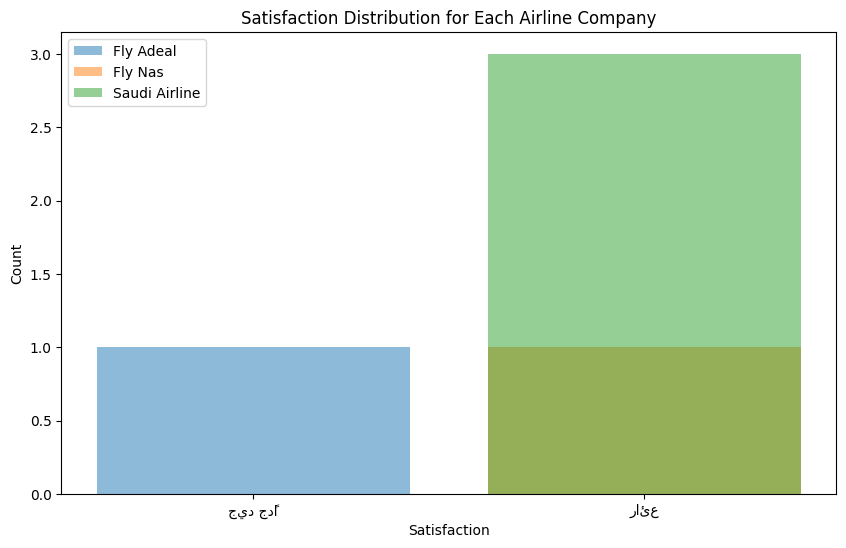

In [12]:

import matplotlib.pyplot as plt
import pandas as pd

# بيانات الشركات بعد التصحيح
data = {
    'Company Name': ['Saudi Airline', 'Saudi Airline', 'Fly Nas', 'Fly Adeal', 'Saudi Airline'],
    'How satisfied are you?': ['رائع', 'رائع', 'رائع', 'جيد جدًا', 'رائع']
}

# تحويل البيانات إلى DataFrame
df = pd.DataFrame(data)

# حساب عدد الرضا لكل شركة طيران
satisfaction_counts = df.groupby('Company Name')['How satisfied are you?'].value_counts().unstack().fillna(0)

# رسم البيانات
plt.figure(figsize=(10, 6))

# رسم توزيع الرضا لكل شركة طيران
for airline in satisfaction_counts.index:
    plt.bar(satisfaction_counts.columns, satisfaction_counts.loc[airline], alpha=0.5, label=airline)

plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.title('Satisfaction Distribution for Each Airline Company')
plt.legend()
plt.show()


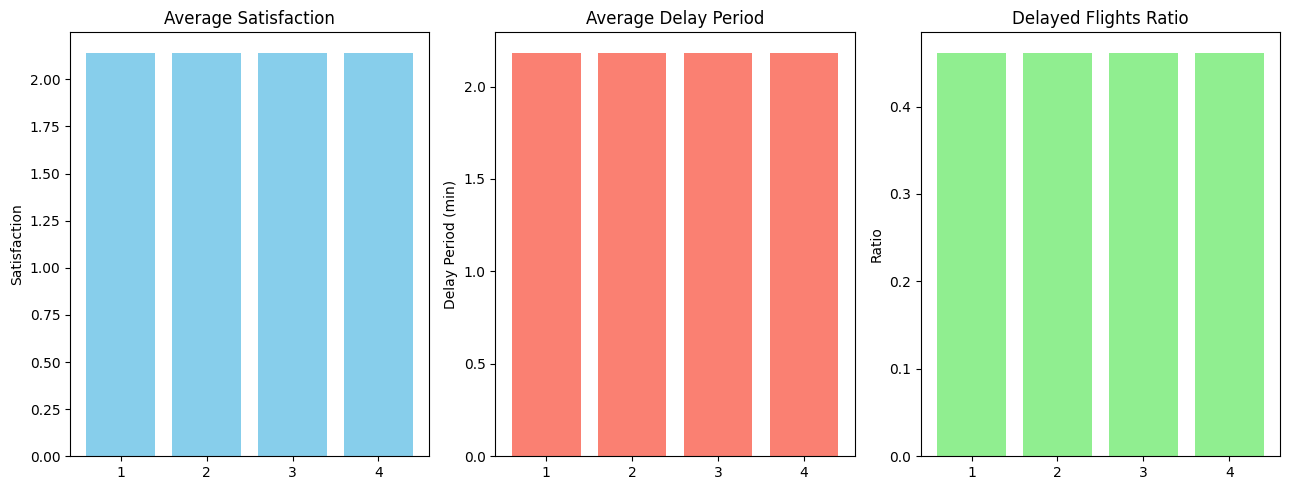

In [13]:

# حساب المتوسط ​​لكل معيار لكل شركة طيران
survey['Average Satisfaction'] = survey['How satisfied are you?'].mean()
survey['Average Delay Period'] = survey['The period of delay? If found'].mean()
survey['Delayed Flights Ratio'] = survey['Was it checked due to the delay?'].mean()

# رسم البيانات
plt.figure(figsize=(13, 5))

# رسم متوسط ​​رضا العملاء
plt.subplot(1, 3, 1)
plt.bar(survey['Company Name'], survey['Average Satisfaction'], color='skyblue')
plt.title('Average Satisfaction')
plt.ylabel('Satisfaction')

# رسم متوسط ​​فترة التأخير
plt.subplot(1, 3, 2)
plt.bar(survey['Company Name'], survey['Average Delay Period'], color='salmon')
plt.title('Average Delay Period')
plt.ylabel('Delay Period (min)')

# رسم نسبة الرحلات المتأخرة
plt.subplot(1, 3, 3)
plt.bar(survey['Company Name'], survey['Delayed Flights Ratio'], color='lightgreen')
plt.title('Delayed Flights Ratio')
plt.ylabel('Ratio')

plt.tight_layout()
plt.show()


In [14]:
# البحث عن الكلمات "سيء" و "أسوأ" في العمود "Review"
bad_reviews = scrap_data[scrap_data['Review'].str.contains('سيء|أسوأ')]

# عرض النتائج (المراجعة واسم الشركة فقط)
print(bad_reviews[['Company Name', 'Review']].head())


      Company Name                                             Review
6          Fly Nas  أسوأ طيران في موضوع استرداد مبالغ الرحلات المل...
101        Fly Nas  خدمة سيئة تعامل سيء تأخير دائم بمواعيد الرحلات...
166  Saudi Airline  سيين جداً يغلق المكنب الساعه 4:30 وصلت لهم الس...
228  Saudi Airline  للاسف الخطوط زمان افضل نقول نعطي فرصه يتحسنون ...
268  Saudi Airline  تعامل سيء وسعر خصم المتقاعدين لا يقبل و بالمكت...


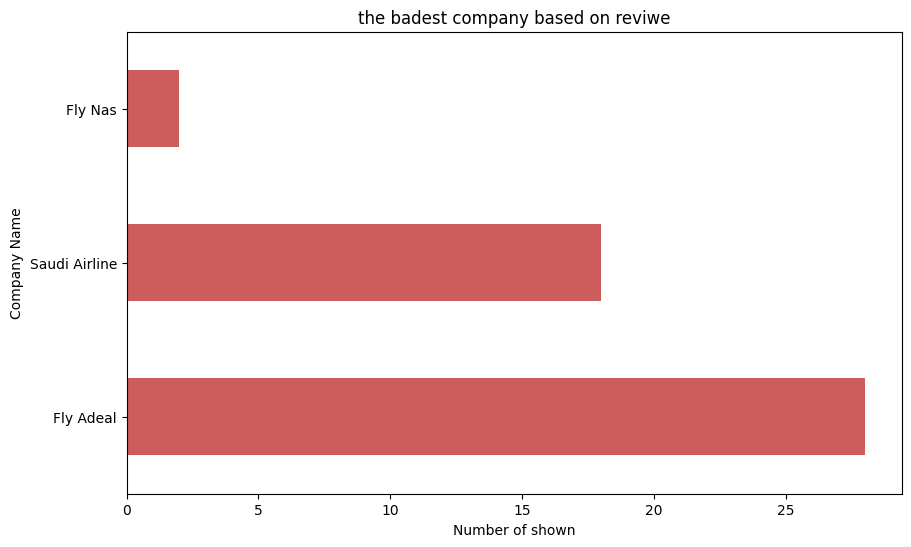

In [15]:
# عدد الظهور لكل شركة في bad_reviews
company_counts = bad_reviews['Company Name'].value_counts()

# عرض أكثر الشركات سوءًا في plot
plt.figure(figsize=(10, 6))  # حجم الرسم البياني
company_counts.head(10).plot(kind='barh', color='indianred')  # عرض أعلى 10 شركات في شريط أفقي
plt.xlabel('Number of shown')
plt.ylabel('Company Name')
plt.title('the badest company based on reviwe')
plt.show()


    Company Name                                             Review
80       Fly Nas  تجربه ممتازه مع الموظف الرائع محمود .انصح بالت...
105      Fly Nas  خدمات ممتازة جدا من حيث الاستقبال الموظفين في ...
106      Fly Nas                         خدمات سريعة وممتازة موفقين
107      Fly Nas  خدمة ممتازة وسريعة اشكر الموظف احمد علي على حس...
108      Fly Nas                                              ممتاز


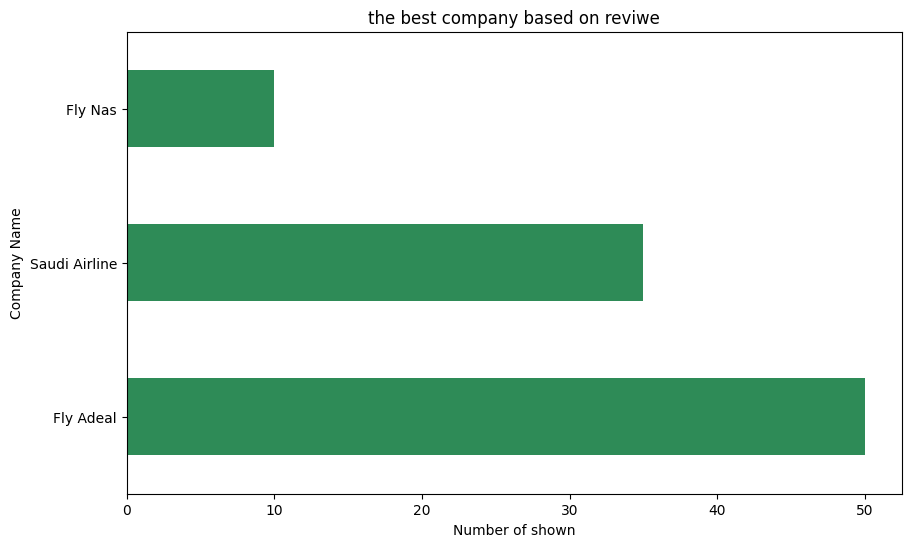

In [16]:
good_reviews = scrap_data[scrap_data['Review'].str.contains('تجنن|افضل طيران|ممتاز')]
# عرض النتائج (المراجعة واسم الشركة فقط)
print(good_reviews[['Company Name', 'Review']].head())
# عدد الظهور لكل شركة في bad_reviews
company_counts1 = good_reviews['Company Name'].value_counts()

# عرض أكثر الشركات سوءًا في plot
plt.figure(figsize=(10, 6))  # حجم الرسم البياني
company_counts1.head(10).plot(kind='barh', color='seagreen')  # عرض أعلى 10 شركات في شريط أفقي
plt.xlabel('Number of shown')
plt.ylabel('Company Name')
plt.title('the best company based on reviwe')
plt.show()